<span style="color: red; font-size: 30px">Unsupervised Learning for Credit Card Customer Segmentation</span>
### Objective:
* Apply unsupervised learning techniques to perform customer segmentation on a credit card dataset, and analyze the results to gain insights into the customer base. Use the K-means clustering algorithm for customer segmentation and visualize the results.

### Dataset:
* Use the "Credit Card Dataset for Clustering" available on Kaggle. You can download the dataset from this link: [Here](https://www.kaggle.com/arjunbhasin2013/ccdata)

#### Steps:
1. Load and preprocess the dataset:
2. Import necessary libraries
3. Load the dataset
4. Drop unnecessary columns or handle missing data, if any Perform feature scaling and normalization
5. Apply the K-means clustering algorithm for customer segmentation:
6. Determine the optimal number of clusters using the elbow method or silhouette score
7. Initialize the KMeans model with the desired number of clusters
8. Fit the model to the data and make predictions
9. Visualize and analyze the results:
10. Visualize the clusters using one or more pairs of features
11. Analyze the characteristics of each cluster to gain insights into the customer base
12. Discuss the implications of the findings for the business, such as targeted marketing strategies

<span style="color: Green; font-size: 30px">Import Libraries</span>

In [31]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

<span style="color: Green; font-size: 30px">Load the Dataset</span>

In [2]:
data = pd.read_csv("CC_GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


<span style="color: Green; font-size: 30px">Data Preprocessing</span>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
# Drop unnecessary columns
data = data.drop("CUST_ID", axis=1)

In [5]:
# check for null values and handle appropriately
print(data.isna().sum()) # CREDIT_LIMIT and MINIMUM_PAYMENTS 

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [6]:
# check for null values and handle appropriately
imputer = SimpleImputer(strategy="median")
data[["CREDIT_LIMIT", "MINIMUM_PAYMENTS"]] = imputer.fit_transform(data[["CREDIT_LIMIT", "MINIMUM_PAYMENTS"]])
# KNNImputer(for both numerical and categorical data) is the other alternative

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

<span style="color: Blue; font-size: 20px">Feature Scaling and Normalization</span>

In [8]:
# Standardization (Z-score normalization):Scales the features to have a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
# After standard scaling you need to convert the numpy.ndarray back to Pandas DataFrame and keep the columns

In [9]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


<span style="color: Blue; font-size: 20px">K-means clustering algorithm for customer segmentation</span>

In [21]:
%%time

best_score = -1
best_num_clusters = 0

silhouette_scores = []
# Calculate silhouette scores for each number of clusters
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    # Determine the optimal number of clusters
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_num_clusters = num_clusters

print(f"Best number of clusters: {best_num_clusters}")

Best number of clusters: 3
CPU times: user 1min 38s, sys: 35 s, total: 2min 13s
Wall time: 1min 4s


In [27]:
# Initialize the KMeans model with the desired number of clusters
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
kmeans.fit(data)
cluster_labels = kmeans.predict(data)

# print silhouette score
silhouette_avg = silhouette_score(data, cluster_labels)
print("Silhouette score:", silhouette_avg)



Silhouette score: 0.25098792290537314


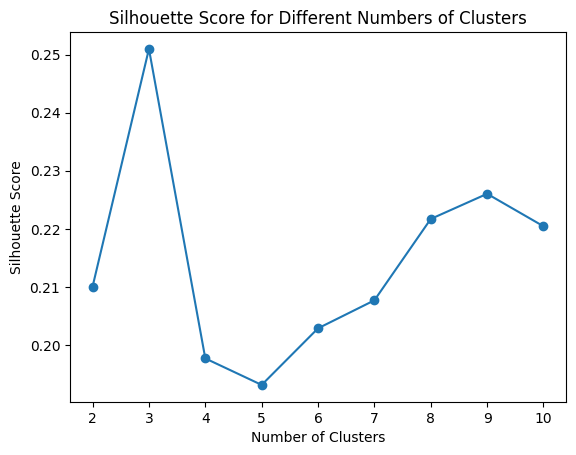

In [20]:
# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

In [29]:
# Add the cluster labels to the original dataset
data["Clusters"] = cluster_labels

<span style="color: Green; font-size: 30px">Visualization</span>

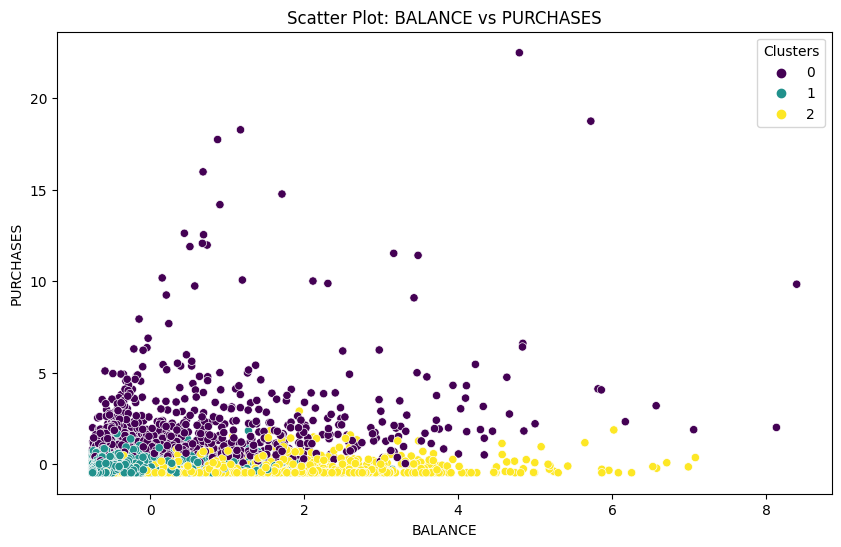

In [38]:
# Scatter plot of BALANCE vs PURCHASES
plt.figure(figsize=(10, 6))
sns.scatterplot(data, x='BALANCE', y='PURCHASES', hue='Clusters', palette='viridis')
plt.title('Scatter Plot: BALANCE vs PURCHASES')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend(title='Clusters')
plt.show()

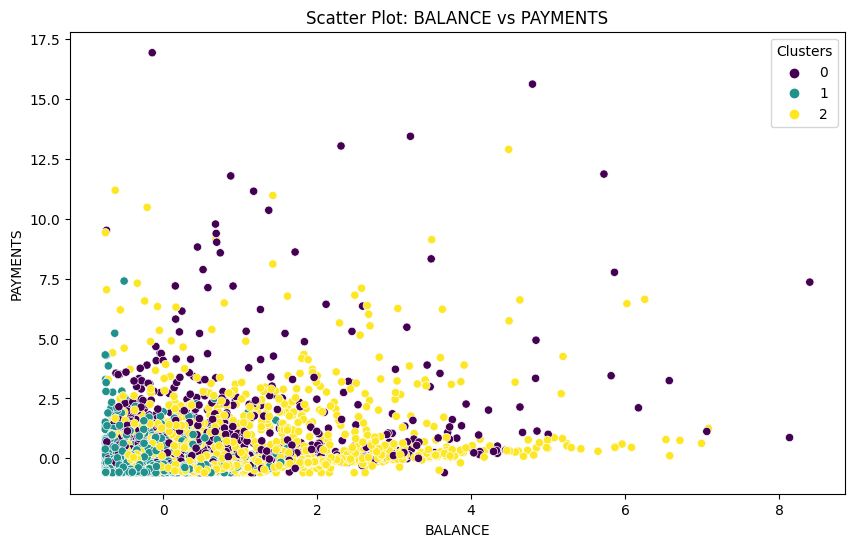

In [37]:
# Scatter plot of BALANCE vs PAYMENTS
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BALANCE', y='PAYMENTS', hue='Clusters', data=data, palette='viridis')
plt.title('Scatter Plot: BALANCE vs PAYMENTS')
plt.xlabel('BALANCE')
plt.ylabel('PAYMENTS')
plt.legend(title='Clusters')
plt.show()

In [40]:
# Analyze the characteristics of each cluster
cluster_summary = data.groupby("Clusters").mean()
print(cluster_summary)

           BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
Clusters                                                             
0         0.296855           0.440840   1.490190          1.248080   
1        -0.363576          -0.180226  -0.237369         -0.207956   
2         1.181558           0.345822  -0.287456         -0.204907   

          INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Clusters                                                              
0                       1.230168     -0.252316             1.140717   
1                      -0.179099     -0.305131            -0.074742   
2                      -0.303300      1.401201            -0.638975   

          ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Clusters                                                                 
0                           1.549758                          0.944057   
1                          -0.245599                         -0.056325 